In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sd
import numpy as np
low_memory=False
%matplotlib inline

In [2]:
campos_receita = ["NR_PARTIDO","NM_PARTIDO","VR_RECEITA"]
campos_despesas = ["NR_PARTIDO","NM_PARTIDO","VR_DESPESA"]
df_receita = pd.read_csv("receitas_orgaos_partidarios_2020_SP.csv",sep = ',',names = campos_receita,)
df_despesas = pd.read_csv("despesas_contratadas_orgaos_partidarios_2020_SP.csv",sep=',',names = campos_despesas)
df_receita.head(5)

,NR_PARTIDO,NM_PARTIDO,VR_RECEITA
0,45,Partido da Social Democracia Brasileira,5000.0
1,15,Movimento Democrático Brasileiro,3000.0
2,17,Partido Social Liberal,1000.0
3,90,Partido Republicano da Ordem Social,1200.0
4,10,REPUBLICANOS,2000.0


In [3]:
df_despesas.head(5)

,NR_PARTIDO,NM_PARTIDO,VR_DESPESA
0,19,PODE,1000.0
1,43,PV,2500.0
2,19,PODE,2.6
3,19,PODE,2.6
4,19,PODE,5.2


In [4]:
total_partidos_receita = {}
total_partidos_despesas = {}
numeros = df_receita["NR_PARTIDO"]
for x in numeros:
    if x not in total_partidos_receita: total_partidos_receita[x] = 0
    if x not in total_partidos_despesas: total_partidos_despesas[x] = 0  
total_partidos_receita and total_partidos_receita


{45: 0,
 15: 0,
 17: 0,
 90: 0,
 10: 0,
 50: 0,
 25: 0,
 12: 0,
 55: 0,
 65: 0,
 23: 0,
 19: 0,
 22: 0,
 18: 0,
 13: 0,
 40: 0,
 11: 0,
 20: 0,
 14: 0,
 77: 0,
 43: 0,
 51: 0,
 70: 0,
 80: 0,
 36: 0,
 28: 0,
 33: 0,
 16: 0,
 27: 0,
 30: 0,
 35: 0,
 21: 0}

In [5]:
partidos = []
numeros = df_despesas["NM_PARTIDO"]
for x in numeros:
    if x not in partidos: partidos.append(x) 
partidos

['PODE',
 'PV',
 'CIDADANIA',
 'PTB',
 'PSD',
 'PSDB',
 'SOLIDARIEDADE',
 'DEM',
 'PDT',
 'REPUBLICANOS',
 'PATRIOTA',
 'PSB',
 'PL',
 'PC do B',
 'PT',
 'PSOL',
 'MDB',
 'AVANTE',
 'PSC',
 'PP',
 'PRTB',
 'PSL',
 'PTC',
 'REDE',
 'NOVO',
 'PMB',
 'DC',
 'PMN',
 'PROS',
 'PSTU',
 'PCB',
 'UP']

In [6]:
#total de Receita de cada partido
lenRows = len(df_receita["VR_RECEITA"])
for row in range(0, lenRows):
    total_partidos_receita[df_receita["NR_PARTIDO"][row]] += df_receita["VR_RECEITA"][row]
total_partidos_receita

{45: 13067044.690000001,
 15: 15725081.989999996,
 17: 16852044.22,
 90: 331403.8,
 10: 14178794.69,
 50: 9394218.059999997,
 25: 5149801.0200000005,
 12: 1257681.9400000002,
 55: 23680772.7,
 65: 776521.39,
 23: 5338271.22,
 19: 28051601.100000005,
 22: 2548110.18,
 18: 5809713.0,
 13: 33695193.68000002,
 40: 22446227.76,
 11: 9843325.129999999,
 20: 264599.47,
 14: 4955444.5,
 77: 9877914.200000001,
 43: 5137069.77,
 51: 9106180.889999999,
 70: 289003.28,
 80: 97426.59,
 36: 722353.2999999999,
 28: 395035.36,
 33: 57116.689999999995,
 16: 3120.0,
 27: 899684.28,
 30: 778202.3099999996,
 35: 24815.0,
 21: 209594.23}

In [7]:
#total de Despesa de cada partido
lenRows = len(df_despesas["VR_DESPESA"])
for row in range(0, lenRows):
    total_partidos_despesas[df_despesas["NR_PARTIDO"][row]] += df_despesas["VR_DESPESA"][row]
total_partidos_despesas
    

{45: 4851398.810000007,
 15: 7973946.489999995,
 17: 11158981.5,
 90: 235569.9,
 10: 12633152.219999993,
 50: 3876034.4200000074,
 25: 4643518.769999992,
 12: 768143.1099999994,
 55: 17564612.250000004,
 65: 717736.0100000002,
 23: 2750258.550000003,
 19: 21229740.709999997,
 22: 1359012.6299999987,
 18: 3496628.5700000003,
 13: 12940530.839999987,
 40: 17851623.490000006,
 11: 3989574.689999997,
 20: 327982.9000000004,
 14: 1987433.4999999995,
 77: 7225063.489999985,
 43: 2130402.22,
 51: 5019893.260000012,
 70: 241752.5899999993,
 80: 57588.95,
 36: 115580.20999999999,
 28: 316933.1400000001,
 33: 37413.10999999999,
 16: 2922.2100000000023,
 27: 757277.6099999999,
 30: 443718.35000000015,
 35: 9532.25,
 21: 2738.55}

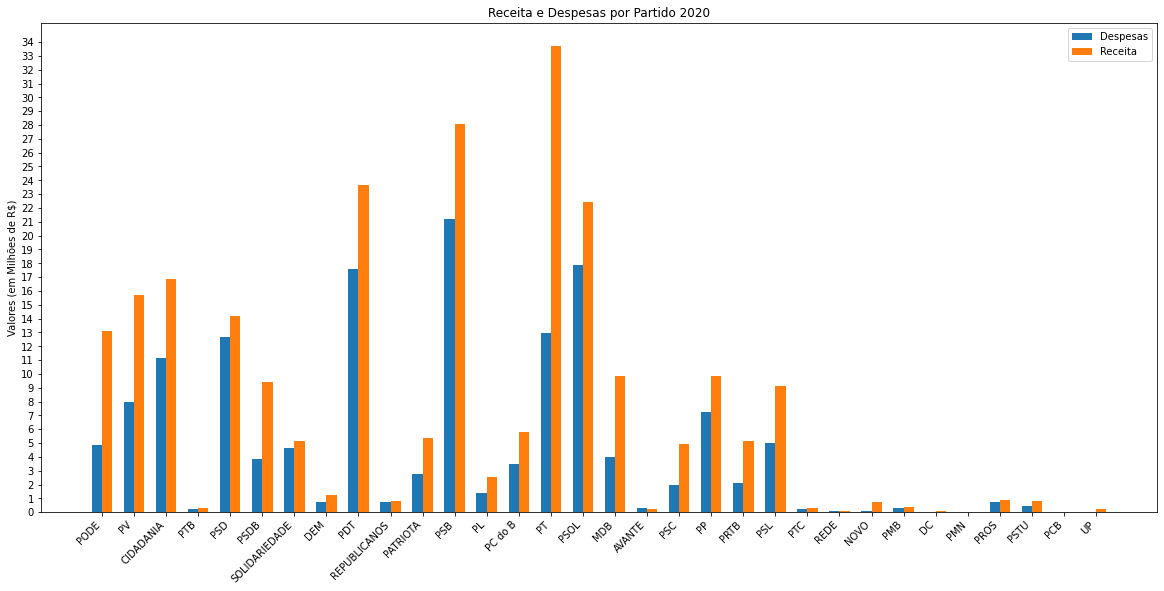

In [12]:
labels = partidos
Despesas= total_partidos_despesas.values()
Receita = total_partidos_receita.values()

x = np.arange(len(labels))  # the label locations

width = 0.32# the width of the bars
fig= plt.figure(figsize= (20,9))
ax = plt.subplot()
ax.bar(x - width/2, Despesas, width, label='Despesas')
ax.bar(x + width/2, Receita, width, label='Receita')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Valores (em Milhões de R$)')
ax.set_yticks(np.arange(0,35000000,1000000))
ax.set_yticklabels(np.arange(0,35,1))
ax.set_title('Receita e Despesas por Partido 2020')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45, horizontalalignment='right')
ax.legend()

plt.show()